***I started this nb as extra practice for the explore exercises, but didn't have time to finish it, to find exploration exercises, see classification_exercises.ipynb***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split # will use this to split data
import explore # will use this to do exploration of data
from acquire_telco import get_telco_data
from prepare_telco import prepare_telco

import warnings
warnings.filterwarnings("ignore")

# EDA using explore.py module on Telco Data 

Per Ryan's message in Slack, I will be doing the Exploratory Analysis exercises in the curriculum that were originally intended for the iris dataset on the telco dataset

## 1.

Acquire, prepare & split your data.

In [2]:
# acquire
df = get_telco_data()

In [3]:
df.shape

(7043, 24)

In [4]:
# prepare and split
train, validate, test = prepare_telco(df)

In [5]:
train.shape, validate.shape, test.shape

((4225, 48), (1409, 48), (1409, 48))

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 6169 to 4266
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 4225 non-null   object 
 1   senior_citizen                         4225 non-null   object 
 2   partner                                4225 non-null   object 
 3   dependents                             4225 non-null   object 
 4   tenure                                 4225 non-null   int64  
 5   phone_service                          4225 non-null   object 
 6   multiple_lines                         4225 non-null   object 
 7   online_security                        4225 non-null   object 
 8   online_backup                          4225 non-null   object 
 9   device_protection                      4225 non-null   object 
 10  tech_support                           4225 non-null   object 
 11  s

## 2.

Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [11]:
quant_vars = train.select_dtypes(include = ['float', 'int']).columns.tolist()
quant_vars

['tenure', 'monthly_charges', 'total_charges']

In [12]:
cat_vars = train.select_dtypes(include = 'object').columns.tolist()
cat_vars

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'internet_service_type',
 'contract_type',
 'payment_type']

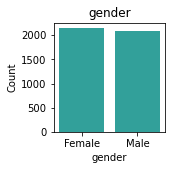

        gender  Count  Percent
Male    Female   2146    50.79
Female    Male   2079    49.21
_________________________________________________________________


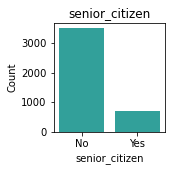

    senior_citizen  Count  Percent
No              No   3508    83.03
Yes            Yes    717    16.97
_________________________________________________________________


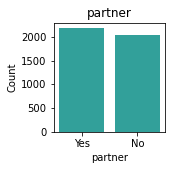

    partner  Count  Percent
No      Yes   2182    51.64
Yes      No   2043    48.36
_________________________________________________________________


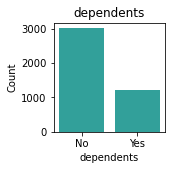

    dependents  Count  Percent
No          No   3012    71.29
Yes        Yes   1213    28.71
_________________________________________________________________


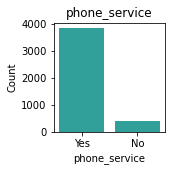

    phone_service  Count  Percent
Yes           Yes   3822    90.46
No             No    403     9.54
_________________________________________________________________


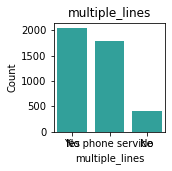

                    multiple_lines  Count  Percent
No                             Yes   2034    48.14
Yes               No phone service   1788    42.32
No phone service                No    403     9.54
_________________________________________________________________


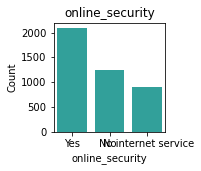

                         online_security  Count  Percent
No                                   Yes   2084    49.33
Yes                                   No   1244    29.44
No internet service  No internet service    897    21.23
_________________________________________________________________


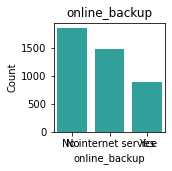

                           online_backup  Count  Percent
No                                    No   1851    43.81
Yes                  No internet service   1477    34.96
No internet service                  Yes    897    21.23
_________________________________________________________________


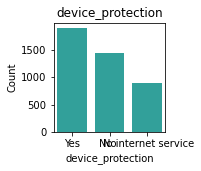

                       device_protection  Count  Percent
No                                   Yes   1892    44.78
Yes                                   No   1436    33.99
No internet service  No internet service    897    21.23
_________________________________________________________________


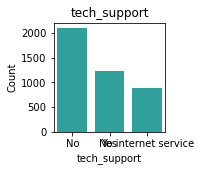

                            tech_support  Count  Percent
No                                    No   2096    49.61
Yes                                  Yes   1232    29.16
No internet service  No internet service    897    21.23
_________________________________________________________________


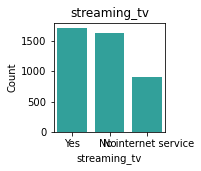

                            streaming_tv  Count  Percent
No                                   Yes   1705    40.36
Yes                                   No   1623    38.41
No internet service  No internet service    897    21.23
_________________________________________________________________


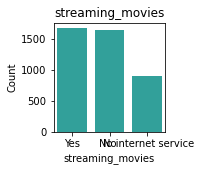

                        streaming_movies  Count  Percent
No                                   Yes   1674    39.62
Yes                                   No   1654    39.15
No internet service  No internet service    897    21.23
_________________________________________________________________


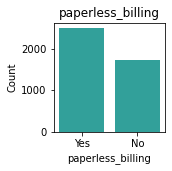

    paperless_billing  Count  Percent
Yes               Yes   2494    59.03
No                 No   1731    40.97
_________________________________________________________________


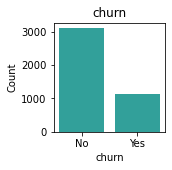

    churn  Count  Percent
No     No   3104    73.47
Yes   Yes   1121    26.53
_________________________________________________________________


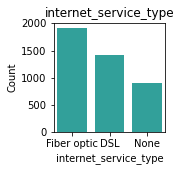

            internet_service_type  Count  Percent
Fiber optic           Fiber optic   1909    45.18
DSL                           DSL   1419    33.59
None                         None    897    21.23
_________________________________________________________________


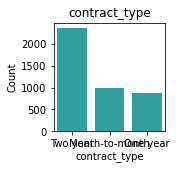

                 contract_type  Count  Percent
Month-to-month        Two year   2361    55.88
Two year        Month-to-month    990    23.43
One year              One year    874    20.69
_________________________________________________________________


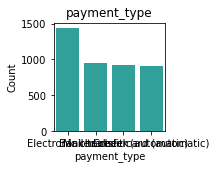

                                        payment_type  Count  Percent
Electronic check                    Electronic check   1440    34.08
Mailed check                            Mailed check    950    22.49
Credit card (automatic)    Bank transfer (automatic)    920    21.78
Bank transfer (automatic)    Credit card (automatic)    915    21.66
_________________________________________________________________


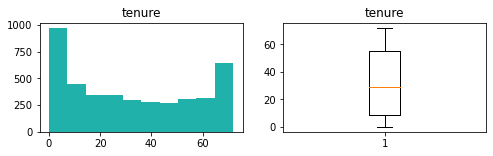

count    4225.000000
mean       32.286627
std        24.500309
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


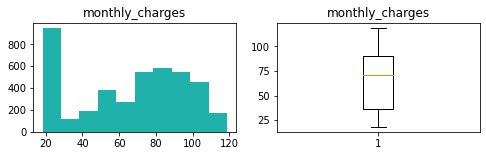

count    4225.000000
mean       65.284817
std        30.033691
min        18.250000
25%        36.150000
50%        71.100000
75%        90.050000
max       118.750000
Name: monthly_charges, dtype: float64


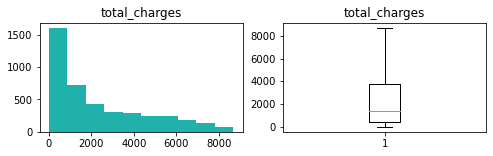

count    4225.000000
mean     2294.868367
std      2265.981134
min         0.000000
25%       399.250000
50%      1422.050000
75%      3808.200000
max      8684.800000
Name: total_charges, dtype: float64


In [13]:
explore.explore_univariate(train, cat_vars, quant_vars)

- **Document takeaways & any actions.**

- Gender of customers is split about 50/50 (as expected)
- Senior citizens make up a small portion of total customers (~17%)
- About half of customers have a partner
- Majority of customers (~71%) don't have dependants
- 

## 3.

Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).
- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types. (NOT APPLICABLE HERE)

- Document takeaways & any actions.

## 4.

Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.
- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.